In [201]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

In [202]:
class OTMANNKernel(gpytorch.kernels.Kernel):
    # the sinc kernel is stationary
    is_stationary = True

#     # this is the kernel function
#     def forward(self, x1, x2, **params):
#         # calculate the distance between inputs
#         diff = self.covar_dist(x1, x2, **params)
#         # prevent divide by 0 errors
#         diff.where(diff == 0, torch.as_tensor(1e-20))
#         # return sinc(diff) = sin(diff) / diff
#         return torch.sin(diff).div(diff)
    
    def forward(self, x1, x2, params=[(1,1),(1,1)]):
        dags1 = [vector_to_dag(vector) for vector in x1]
        dags2 = [vector_to_dag(vector) for vector in x2]
        
        dist = torch.zeros(size=(len(dags1), len(dags2)))
        norm_dist = torch.zeros_like(dist)
        for i,dag1 in enumerate(dags1):
            for j,dag2 in enumerate(dags2):
                dist[i,j], norm_dist[i,j] = OTMANN(dag1, dag2)
                
        return params[0][0]*torch.exp(-params[0][1]*dist) + params[1][0]*torch.exp(-params[1][1]*norm_dist)
    
        

In [12]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.visualization import dag_drawer

----------


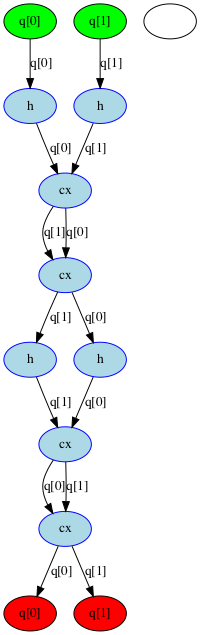

In [209]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.cx(1,0)
qc.h(1)
qc.h(0)
qc.cx(1,0)
qc.cx(0,1)

#print(qc.draw())
print('----------')

dag = circuit_to_dag(qc)
dag_nx = dag.to_networkx()

rec_qc = dag_to_circuit(dag)
#print(rec_qc.draw())

dag.draw()


In [211]:
import networkx as nx

def topological_sort_grouped(G):
    indegree_map = {v: d for v, d in G.in_degree() if d > 0}
    zero_indegree = [v for v, d in G.in_degree() if d == 0]
    #print(len(zero_indegree), len(indegree_map))
    while zero_indegree:
        yield zero_indegree
        new_zero_indegree = []
        for v in zero_indegree:
            for _, child in G.edges(v):
                indegree_map[child] -= 1
                if not indegree_map[child]:
                    new_zero_indegree.append(child)
        zero_indegree = new_zero_indegree
        
                
for layer in list(topological_sort_grouped(dag_nx)):
    for node in layer:
        print(node.name, node.type, node.qargs)
nodelist = [node for layer in list(topological_sort_grouped(dag_nx)) for node in layer]
print(len(nodelist))

print('---------')

for node in list(nx.algorithms.dag.lexicographical_topological_sort(dag_nx)):
    print(node.name, node.type, node.qargs)

print('---------')

for node in list(dag.topological_nodes()):
    print(node.name, node.type, node.qargs)

None in []
None in []
h op [Qubit(QuantumRegister(2, 'q'), 0)]
h op [Qubit(QuantumRegister(2, 'q'), 1)]
cx op [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
cx op [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
h op [Qubit(QuantumRegister(2, 'q'), 0)]
h op [Qubit(QuantumRegister(2, 'q'), 1)]
cx op [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
cx op [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
None out []
None out []
12
---------
None in []
None in []
h op [Qubit(QuantumRegister(2, 'q'), 0)]
h op [Qubit(QuantumRegister(2, 'q'), 1)]
cx op [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
cx op [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
h op [Qubit(QuantumRegister(2, 'q'), 1)]
h op [Qubit(QuantumRegister(2, 'q'), 0)]
cx op [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
cx op [Qubit(QuantumRegister(2, 'q'), 0), Qubit(Quan

In [215]:
for node in nodelist:
    print(node.type, node.name, node.qargs)
    
nx.linalg.graphmatrix.adjacency_matrix(dag_nx, nodelist).toarray()

in None []
in None []
op h [Qubit(QuantumRegister(2, 'q'), 0)]
op h [Qubit(QuantumRegister(2, 'q'), 1)]
op cx [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
op cx [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
op h [Qubit(QuantumRegister(2, 'q'), 0)]
op h [Qubit(QuantumRegister(2, 'q'), 1)]
op cx [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)]
op cx [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
out None []
out None []


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [351]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.cx(0,1)
qc.cx(1,0)
qc.h([0,1,2])
qc.cx(1,0)
qc.cx(2,1)

#print(qc.draw())
print('----------')

dag = circuit_to_dag(qc)
dag_nx = dag.to_networkx()

rec_qc = dag_to_circuit(dag)
#print(rec_qc.draw())

dag.draw()

nodelist = [node for layer in list(topological_sort_grouped(dag_nx)) for node in layer]
for node in nodelist:
    print(node.type, node.name, node.qargs)
    
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(dag_nx, nodelist).toarray()

----------
in None []
in None []
in None []
op h [Qubit(QuantumRegister(3, 'q'), 0)]
op h [Qubit(QuantumRegister(3, 'q'), 1)]
op h [Qubit(QuantumRegister(3, 'q'), 2)]
op cx [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)]
op h [Qubit(QuantumRegister(3, 'q'), 2)]
op cx [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)]
op h [Qubit(QuantumRegister(3, 'q'), 1)]
op h [Qubit(QuantumRegister(3, 'q'), 0)]
op cx [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)]
op cx [Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1)]
out None []
out None []
out None []


     ┌───┐     ┌───┐┌───┐┌───┐     
q_0: ┤ H ├──■──┤ X ├┤ H ├┤ X ├─────
     ├───┤┌─┴─┐└─┬─┘├───┤└─┬─┘┌───┐
q_1: ┤ H ├┤ X ├──■──┤ H ├──■──┤ X ├
     ├───┤├───┤     └───┘     └─┬─┘
q_2: ┤ H ├┤ H ├─────────────────■──
     └───┘└───┘                    


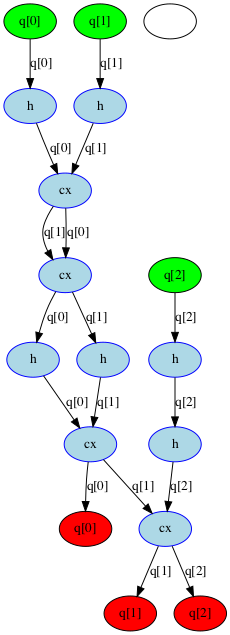

In [352]:
print(qc.draw())
dag.draw()

In [473]:
def encode_adj(adj_matrix, nodelist, MAX_N_VERTICES=None):
    """ 
    compute the "standard" encoding,
    i.e. adjacency matrix + op list encoding 
    """
    if MAX_N_VERTICES == None:
        MAX_N_VERTICES = len(nodelist)
    
    DIRECTED_TWO_QUBIT_GATES = ['cx']
    def node_info(node):
        nodetype = node.type
        
        if nodetype in ['in','out']:
            qubit = node.wire.index
            info = '_'.join([nodetype, str(qubit)])
            
        else: # i.e. nodetype == 'op':
            if node.name in DIRECTED_TWO_QUBIT_GATES:
                ctrl_qubit = node.qargs[0].index
                applied_qubit = node.qargs[1].index
                if ctrl_qubit < applied_qubit:
                    info = '_'.join([node.name, 'down'])
                else:
                    info = '_'.join([node.name, 'up'])
            else:
                info = node.name
        #print(info)    
        return info
            
    
    NUM_VERTICES = len(nodelist)
    #dic = {CONV1X1: 0., CONV3X3: 0.5, MAXPOOL3X3: 1.0}
    NODE_DICT = {'h':0.5, 
          'cx_down':0.4,
          'cx_up':0.6,
          'in_0':0.1, 'in_1':0.13, 'in_2':0.16, 'in_3':0.2,
          'out_0':0.9, 'out_1':0.87, 'out_2':0.84, 'out_3':0.8}
    
    ADJ_ENCODING_LENGTH = (MAX_N_VERTICES ** 2 - MAX_N_VERTICES) // 2
    encoding_length = ADJ_ENCODING_LENGTH + MAX_N_VERTICES
    encoding = np.zeros((encoding_length))
    
    padded_adj_matrix = -np.ones(shape=(MAX_N_VERTICES, MAX_N_VERTICES))
    padded_adj_matrix[0:adj_matrix.shape[0], 0:adj_matrix.shape[1]] = adj_matrix
    #print(padded_adj_matrix)

    
    ## The first part contains upper diagonal entries of adj matrix (diagonal excluded)
    iu = np.triu_indices(MAX_N_VERTICES, k=1)
    encoding[0: ADJ_ENCODING_LENGTH] = padded_adj_matrix[iu]
    
    ## The second part is the coded nodelist
    encoding[ADJ_ENCODING_LENGTH:]= -1
    for i in range(len(nodelist)):
        encoding[ADJ_ENCODING_LENGTH + i] = NODE_DICT[node_info(nodelist[i])]
    return encoding, padded_adj_matrix

def decode_adj(adj_code, MAX_N_VERTICES=None):
    if MAX_N_VERTICES == None:
        MAX_N_VERTICES = int((-1+np.sqrt(1+8*len(adj_code)))//2)
    else:
        assert MAX_N_VERTICES == (-1+np.sqrt(1+8*len(adj_code)))//2, "MAX_N_VERTICES is incompatible with adj_code"

    true_code = adj_code[:-MAX_N_VERTICES]
    node_code = adj_code[-MAX_N_VERTICES:]
    
    ## Reconstruct nodelist
    REV_NODE_DICT = {0.5:'h',
                    0.4:'cx_down',
                    0.6:'cx_up',
                    0.1:'in_0', 0.13:'in_1', 0.16:'in_2', 0.2:'in_3',
                    0.9:'out_0', 0.87:'out_1', 0.84:'out_2', 0.8:'out_3'}
    
    nodelist = []
    for code in node_code:
        if code != -1:
            nodelist.append(REV_NODE_DICT[code])
    
    ## Reconstruct adj_matrix
    rec_padded_adj_matrix = -np.ones(shape=(MAX_N_VERTICES, MAX_N_VERTICES))
    iu = np.triu_indices(MAX_N_VERTICES, k=1)
    rec_padded_adj_matrix[iu] = true_code
    
    # Fill out 0 to subdiagonal entries (diagonal included)
    il = np.tril_indices(MAX_N_VERTICES, k=0)
    rec_padded_adj_matrix[il] = 0
    rec_padded_adj_matrix[len(nodelist):, :] = -1
    
    rec_adj_matrix = rec_padded_adj_matrix[:len(nodelist), :len(nodelist)]
    
    return rec_adj_matrix, nodelist

def adj_to_qc(adj_matrix, raw_nodelist):
    
    ## Compute the number of qubits and initialize the circuit]
    assert len([node for node in raw_nodelist if 'in' in node]) == len([node for node in raw_nodelist if 'out' in node])
    n_qubits = len([node for node in raw_nodelist if 'in' in node])
    qc = QuantumCircuit(n_qubits)
    
#     dagcircuit = DAGCircuit()
#     dagcircuit.add_qubits(qc.qubits)
#     dagcircuit.add_clbits(qc.clbits)
#     for register in qc.qregs:
#         dagcircuit.add_qreg(register)
#     for register in qc.clregs:
#         dagcircuit.add_creg(register)
#     for instruction, qargs, cargs in qc.data:
#         dagcircuit.apply_operation_back(instruction.copy(), qargs, cargs)

    
    
    ## Compute operation list
    op_list = []
    incomplete = []
    for i,node in enumerate(raw_nodelist):
        if ('in' in node) or ('out' in node):
            pass
        else:
            split = node.split('_')
            if len(split) == 1: # undirected gate
                if len
                op_list.append((node, qargs, cargs))
            elif len(split) == 2: # directed gate
                node_name, direction = split
                op_list.append((node_name, qargs, cargs))

In [ ]:
# dagcircuit = DAGCircuit()

# dagcircuit.add_qubits(qc.qubits)
# dagcircuit.add_clbits(qc.clbits)

# for register in qc.qregs:
#     dagcircuit.add_qreg(register)
# for register in qc.cregs:
#     dagcircuit.add_creg(register)
    
# for instruction, qargs, cargs in qc.data:    
#     dagcircuit.apply_operation_back(instruction.copy(), qargs, cargs)

In [514]:
adj_code, padded_adj_matrix = encode_adj(adj_matrix, nodelist, 18)
rec_adj_matrix, rec_nodelist = decode_adj(adj_code, 18)
print(nodelist)
print(adj_code)
#print(padded_adj_matrix)
print(rec_adj_matrix)
print(rec_nodelist)

[<qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8760ae8a00>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f875a5e2fa0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f875a5e2b20>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8754b5f280>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8754b5fee0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8754b5f760>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f87548d06a0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f87548d0ca0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f87548d0d60>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8754b5fc40>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f875a5e23a0>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f8760cda880>, <qiskit.dagcircuit.dagnode.DAGNode object at 0x7f875a5e2e20>]
[ 0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
 -1.   -1.   -1.   -1.   -1.    0.    0.    1.    0.    0.    0.    0.
  0.    0.    0.    0.   -1.   -1.   -1.   -1.   -1

/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:14: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  qubit = node.wire.index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:19: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  ctrl_qubit = node.qargs[0].index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:20: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  applied_qubit = node.qargs[1].index


In [371]:
for op in qc.data:
    print(op)

(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f87703a5c70>, [Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f87703a5c70>, [Qubit(QuantumRegister(3, 'q'), 1)], [])
(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f87703a5c70>, [Qubit(QuantumRegister(3, 'q'), 2)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7f875a670550>, [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7f87703a5c10>, [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f875a670610>, [Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f875a670610>, [Qubit(QuantumRegister(3, 'q'), 1)], [])
(<qiskit.circuit.library.standard_gates.h.HGate object at 0x7f875a670610>, [Qubit(QuantumRegister(3, 'q'), 2)], [])


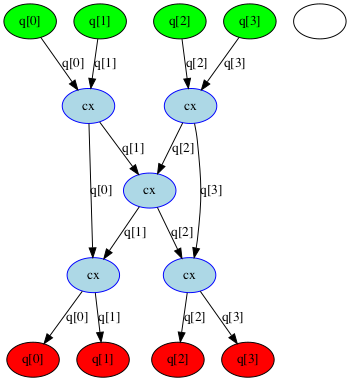

In [479]:
qc = QuantumCircuit(4)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(1,2)
qc.cx(1,0)
qc.cx(2,3)

dag = circuit_to_dag(qc)
dag_nx = dag.to_networkx()
dag.draw()

In [590]:
nodelist = [node for layer in list(topological_sort_grouped(dag_nx)) for node in layer]
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(dag_nx, nodelist).toarray()

adj_code, padded_adj_matrix = encode_adj(adj_matrix, nodelist)
rec_adj_matrix, rec_nodelist = decode_adj(adj_code)

print("Check if reconstructed adj_matrix is correct:", (adj_matrix==rec_adj_matrix).all())
print(rec_adj_matrix)
print(rec_nodelist)
for node in nodelist:
    if node.type in ['in', 'out']:
        print(node.type, node.name, node.wire)
    else:
        print(node.type, node.name, node.qargs, node.op)


Check if reconstructed adj_matrix is correct: True
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['in_0', 'in_1', 'in_2', 'in_3', 'cx_up', 'cx_down', 'cx_down', 'cx_down', 'cx_up', 'out_3', 'out_2', 'out_0', 'out_1']
in None Qubit(QuantumRegister(4, 'q'), 0)
in None Qubit(QuantumRegister(4, 'q'), 1)
in None Qubit(QuantumRegister(4, 'q'), 2)
in None Qubit(QuantumRegister(4, 'q'), 3)
op cx [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 0)] <qiskit.circuit.library.standard_gate

/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:14: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  qubit = node.wire.index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:19: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  ctrl_qubit = node.qargs[0].index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:20: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  applied_qubit = node.qargs[1].index


In [603]:
a = [4,3,1,2]
print(a.pop(1))
print(a)

3
[4, 1, 2]


In [605]:
a[0] = 10
a

[10, 1, 2]

In [580]:
list(dag.nodes())

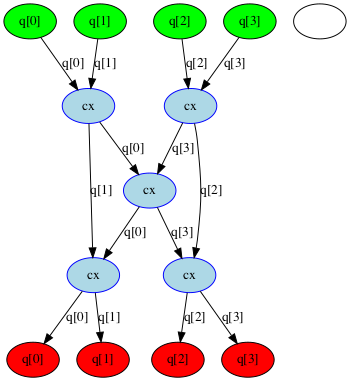

In [481]:
qc = QuantumCircuit(4)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(0,3)
qc.cx(1,0)
qc.cx(2,3)

dag = circuit_to_dag(qc)
dag_nx = dag.to_networkx()
dag.draw()

In [586]:
qc.qubits

[Qubit(QuantumRegister(4, 'q'), 0),
 Qubit(QuantumRegister(4, 'q'), 1),
 Qubit(QuantumRegister(4, 'q'), 2),
 Qubit(QuantumRegister(4, 'q'), 3)]

In [585]:
help(dag._multi_graph)

Help on PyDAG in module retworkx object:

class PyDAG(PyDiGraph)
 |  PyDAG(check_cycle=False, multigraph=True, /)
 |  
 |  A class for creating direct acyclic graphs.
 |  
 |  PyDAG is just an alias of the PyDiGraph class and behaves identically to
 |  the :class:`~retworkx.PyDiGraph` class and can be used interchangably
 |  with ``PyDiGraph``. It currently exists solely as a backwards
 |  compatibility alias for users of retworkx from prior to the
 |  0.4.0 release when there was no PyDiGraph class.
 |  
 |  The PyDAG class is used to create a directed graph. It can be a
 |  multigraph (have multiple edges between nodes). Each node and edge
 |  (although rarely used for edges) is indexed by an integer id. These ids
 |  are stable for the lifetime of the graph object and on node or edge
 |  deletions you can have holes in the list of indices for the graph.
 |  Node indices will be reused on additions after removal. For example:
 |  
 |  .. jupyter-execute::
 |  
 |      import retworkx

In [627]:
nodelist = [node for layer in list(topological_sort_grouped(dag_nx)) for node in layer]
adj_matrix = nx.linalg.graphmatrix.adjacency_matrix(dag_nx, nodelist).toarray()

adj_code, padded_adj_matrix = encode_adj(adj_matrix, nodelist)
rec_adj_matrix, rec_nodelist = decode_adj(adj_code)

print("Check if reconstructed adj_matrix is correct:", (adj_matrix==rec_adj_matrix).all())
print(rec_adj_matrix)
print(rec_nodelist)
for node in nodelist:
    #print(type(node))
    if node.type in ['in', 'out']:
        print(node.type, node.name, node.wire)
        pass
    else:
        print(node.type, node.name, node.qargs)
        pass

Check if reconstructed adj_matrix is correct: True
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['in_0', 'in_1', 'in_2', 'in_3', 'cx_up', 'cx_down', 'cx_down', 'cx_down', 'cx_up', 'out_3', 'out_2', 'out_0', 'out_1']
in None Qubit(QuantumRegister(4, 'q'), 0)
in None Qubit(QuantumRegister(4, 'q'), 1)
in None Qubit(QuantumRegister(4, 'q'), 2)
in None Qubit(QuantumRegister(4, 'q'), 3)
op cx [Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 0)]
op cx [Qubit(QuantumRegister(4, 'q'),

/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:14: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  qubit = node.wire.index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:19: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  ctrl_qubit = node.qargs[0].index
/var/folders/k7/xbg0txh97kb_tz_4gnqjl7cm0000gn/T/ipykernel_86326/3128408555.py:20: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  applied_qubit = node.qargs[1].index


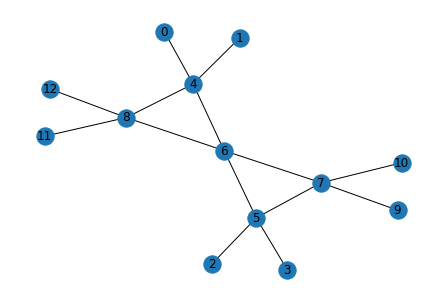

In [550]:
G = nx.convert_matrix.from_numpy_matrix(rec_adj_matrix)
nx.draw(G, with_labels=True)

In [557]:
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘  │  └─┬─┘
q_1: ──■────┼────■──
            │       
q_2: ──■────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

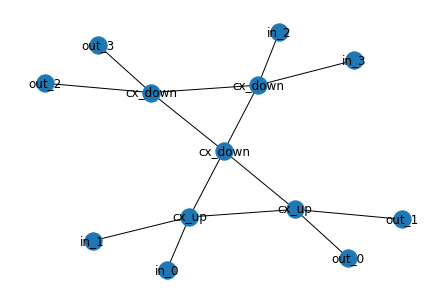

In [555]:
node_labeling = {i:rec_nodelist[i] for i in G.nodes()}
#G = nx.relabel_nodes(G, node_labeling)
nx.draw(G, labels=node_labeling)

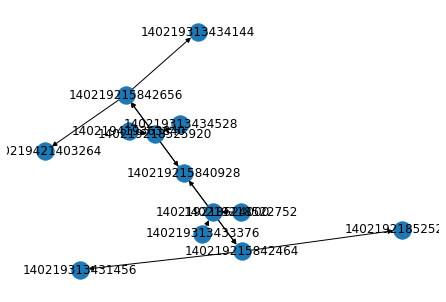

In [563]:
nx.draw(dag_nx, with_labels=True)

In [569]:
# for instruction, qargs, cargs in qc.data:
#     print(instruction, qargs, cargs)

In [573]:
from qiskit.dagcircuit import DAGCircuit
rec_dag = DAGCircuit.from_networkx(dag_nx)
for node in rec_dag.topological_nodes():
    print(node.type, node.name)

in None
in None
op cx
in None
in None
op cx
op cx
op cx
op cx
out None
out None
out None
out None


In [509]:
from qiskit.dagcircuit.dagcircuit import DAGCircuit

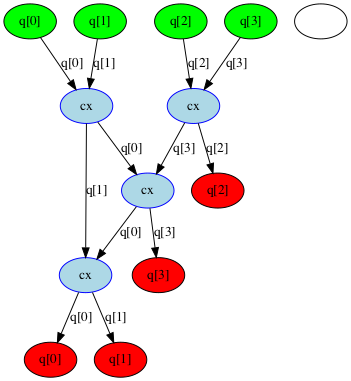

In [513]:
dagcircuit = DAGCircuit()

dagcircuit.add_qubits(qc.qubits)
dagcircuit.add_clbits(qc.clbits)

for register in qc.qregs:
    dagcircuit.add_qreg(register)
for register in qc.cregs:
    dagcircuit.add_creg(register)
    
for instruction, qargs, cargs in qc.data[:4]:    
    dagcircuit.apply_operation_back(instruction.copy(), qargs, cargs)
dagcircuit.draw()

In [458]:
qc.qubits

[Qubit(QuantumRegister(4, 'q'), 0),
 Qubit(QuantumRegister(4, 'q'), 1),
 Qubit(QuantumRegister(4, 'q'), 2),
 Qubit(QuantumRegister(4, 'q'), 3)]

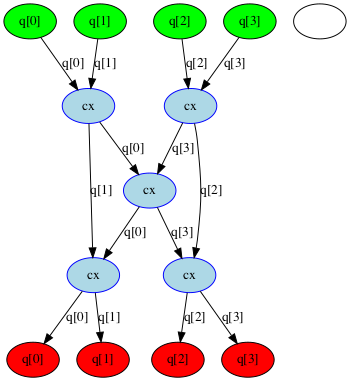

In [454]:
dagcircuit.draw()

In [680]:
import qiskit.circuit.library as library
from qiskit.circuit import Parameter, ParameterVector

CXGate = library.CXGate

qc = QuantumCircuit(4)

qarg_idx = [1,3]

qc.append(CXGate(), [qc.qubits[i] for i in qarg_idx])

alpha = Parameter('alpha')
beta = ParameterVector('beta',0)
qc.ry(alpha, 0)
qc.rzz(beta[1], 2,3)
alpha = Parameter()
qc.rx(alpha, 0)

qc.draw()

IndexError: Index out of range: 1 > 0

In [666]:
qc.num_parameters

2

In [675]:
RXXGate = library.RXXGate
RXXGate(alpha).is_parameterized()

True

In [696]:
num_qubits = 4
a = np.linspace(0,1,2*num_qubits+1)
a[1::2]

array([0.125, 0.375, 0.625, 0.875])

In [681]:
help(beta)

Help on ParameterVector in module qiskit.circuit.parametervector object:

class ParameterVector(builtins.object)
 |  ParameterVector(name, length=0)
 |  
 |  ParameterVector class to quickly generate lists of parameters.
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, name, length=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  index(self, value)
 |      Returns first index of value.
 |  
 |  resize(self, length)
 |      Resize the parameter vector.
 |      
 |      If necessary, new elements are generated. If length is smaller than before, the
 |      previous elements are cached and not re-generated if the vector is enlarged again.
 |      This is to ensure that the parameter instances do not change.
 |  
 |  ----------------------------------------------------------